In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import time, sys, random
from time import sleep
import itertools

In [2]:
%matplotlib inline

In [10]:
class Dot:
    
    def __init__(self, index, speed, ang, temp):
        self.index = index
        self.pos = [0, 0]
        self.speed = speed        
        self.ang = ang        
        self.temp = temp
    
    def get_info(self):
        return {
            "pos": self.pos,
            "speed": self.speed,
            "ang": self.ang,
            "temp": self.temp
        }
    
    def get_pos(self):
        return self.pos
    
    def get_index(self):
        return self.index
    
    def set_pos(self, pos):
        self.pos = pos
        return True

In [24]:
class App:
    
    def __init__(self, dimensions, dots):
        self.dimensions = dimensions
        self.dots = dots
        self.dots_pos = {}
        self.dots_conections = []
        self.build_plot(self.dimensions, self.dots)
        
    def build_plot(self, dimensions, dots):
        total_dots = dimensions[0] * dimensions[1]
        data = []

        if len(dots) != total_dots:
            print("Dimensões inválidas")
        else:
            x = 0
            y = 0
            d = []
            for dot in dots:
                x += 1
                info = dot.get_info()
                # set dot position
                dot.set_pos([x, y+1])
                d.append(info["temp"] - 273)
                if x == dimensions[0] :
                    data.append(d)
                    d = []
                    x = 0
                    y += 1
                    
            # load dot position
            self._load_dots_pos()

            fig, ax = plt.subplots()
            ax.imshow(data, cmap='coolwarm')

            # draw gridlines
            ax.grid(which='major', axis='both', linestyle='-', linewidth=2)
            ax.set_xticks(np.arange(-0.5, dimensions[0], 1));
            ax.set_yticks(np.arange(-0.5, dimensions[1], 1));
            ax.set_xticklabels([])
            ax.set_yticklabels([])

            # print temperature
            for dot in dots:
                info = dot.get_info()
                pos = info['pos']
                label = info['temp']
                ax.text(pos[0]-1, pos[1]-1, label, color='black', ha='center', va='center', weight="bold")

            plt.show()
            
            
    def _load_interacoes(self, dots):
        conectados = []
        for dot in dots:
            pos = dot.get_pos()
            index = dot.get_index()
            
            value = self.get_dot_per_pos([pos[0]-1, pos[1]])
            if(value):
                if index > value.get_index():
                    conectados.append([value, dot])
                else:
                    conectados.append([dot, value])  
        
            value = self.get_dot_per_pos([pos[0]+1, pos[1]])
            if(value):
                if index > value.get_index():
                    conectados.append([value, dot])
                else:
                    conectados.append([dot, value])  
            
            value = self.get_dot_per_pos([pos[0], pos[1]-1])
            if(value):
                if index > value.get_index():
                    conectados.append([value, dot])
                else:
                    conectados.append([dot, value]) 
                    
            value = self.get_dot_per_pos([pos[0], pos[1]+1])
            if(value):
                if index > value.get_index():
                    conectados.append([value, dot])
                else:
                    conectados.append([dot, value])  
        
        conectados.sort()
        self.dots_conections = list(k for k,_ in itertools.groupby(conectados))
        
        
    def _load_dots_pos(self):
        resp = {}
        for dot in dots:
            pos = dot.get_pos()
            
            resp[self._pos_to_str(pos)] = dot

        self.dots_pos = resp
        self._load_interacoes(dots)
    
    def _pos_to_str(self, pos):
        return f"{pos[0]}-{pos[1]}"
    
    def get_dot_per_pos(self, pos):
        pos = self._pos_to_str(pos)
        if pos in self.dots_pos:
            return self.dots_pos[pos]
        else:
            return False
        
    def cycle(self, dots, h=0.024, tempo = 60, area = 1):
        # 1cal=4,186J
        for conn in self.dots_conections:
            
    def run(self):
        while True:
            sleep(1)
            

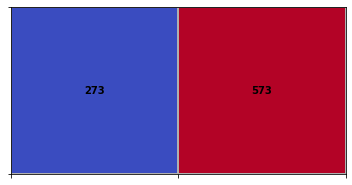

In [29]:
dots = []
dots.append(Dot(1, 0, 0, 273))
dots.append(Dot(2, 0, 0, 573))
dimensions = [2,1]

app = App(dimensions, dots)